In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


# Downloading dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


# Loading dataset

In [4]:
ab=pd.read_csv('Mall_Customers.csv')
ab.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Visualization

**Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


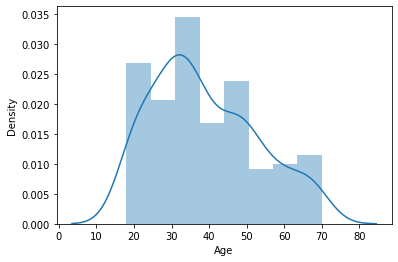

In [ ]:
sb.distplot(ab.Age)

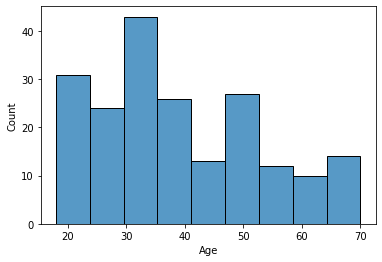

In [ ]:
sb.histplot(ab.Age)

**Bivariate Analysis**

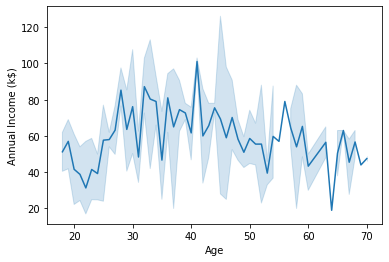

In [ ]:
sb.lineplot(x=ab['Age'],y=ab['Annual Income (k$)'])

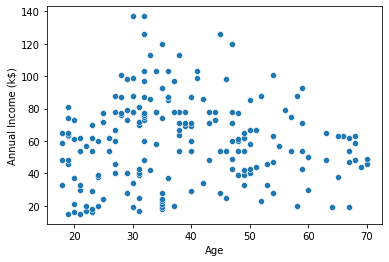

In [ ]:
sb.scatterplot(data=ab, x="Age", y="Annual Income (k$)")

**Multivariate Analysis**

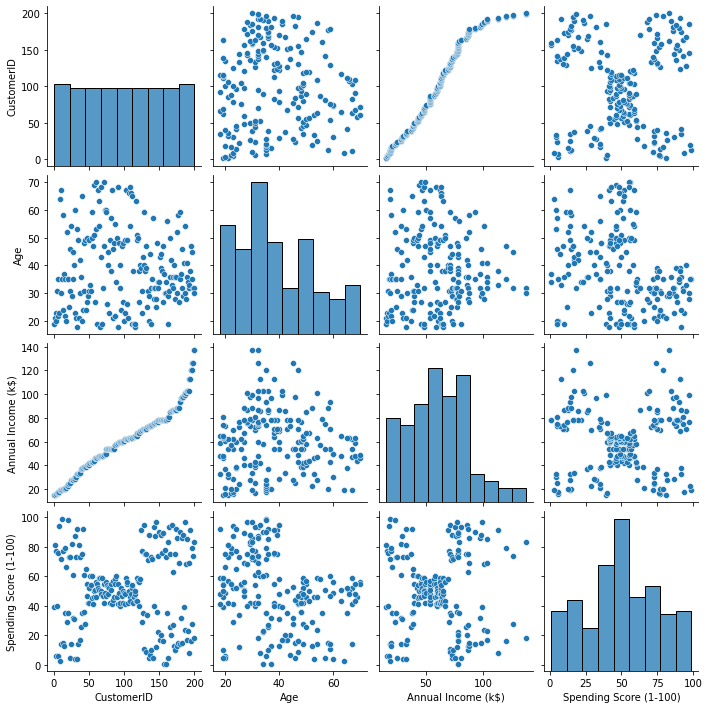

In [ ]:
sb.pairplot(ab)

# Descriptive Statistic

In [5]:
ab.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
ab.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [ ]:
ab.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [ ]:
ab.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


# Checking for missing values

In [ ]:
ab.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# Finding outliers and replacing them

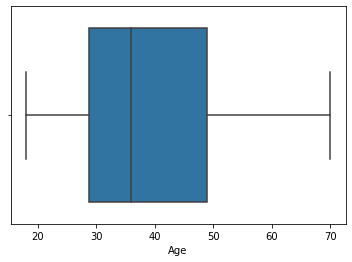

In [6]:
x=sb.boxplot(x=ab.Age)
x

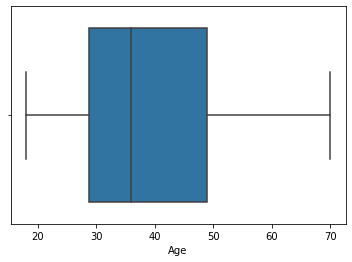

In [ ]:
x = ab.Age
sb.boxplot(x=x)

In [ ]:
x = np.where(ab['Age']>50,40, ab['Age'])
x

array([19, 21, 20, 23, 31, 22, 35, 23, 40, 30, 40, 35, 40, 24, 37, 22, 35,
       20, 40, 35, 35, 25, 46, 31, 40, 29, 45, 35, 40, 23, 40, 21, 40, 18,
       49, 21, 42, 30, 36, 20, 40, 24, 48, 31, 49, 24, 50, 27, 29, 31, 49,
       33, 31, 40, 50, 47, 40, 40, 27, 40, 40, 19, 40, 40, 40, 18, 43, 40,
       19, 32, 40, 47, 40, 40, 40, 26, 45, 40, 23, 49, 40, 38, 40, 46, 21,
       48, 40, 22, 34, 50, 40, 18, 48, 40, 32, 24, 47, 27, 48, 20, 23, 49,
       40, 26, 49, 21, 40, 40, 40, 40, 40, 19, 38, 19, 18, 19, 40, 49, 40,
       50, 27, 38, 40, 39, 23, 31, 43, 40, 40, 38, 47, 39, 25, 31, 20, 29,
       44, 32, 19, 35, 40, 32, 28, 32, 25, 28, 48, 32, 34, 34, 43, 39, 44,
       38, 47, 27, 37, 30, 34, 30, 40, 29, 19, 31, 50, 36, 42, 33, 36, 32,
       40, 28, 36, 36, 40, 30, 40, 27, 40, 35, 37, 32, 46, 29, 41, 30, 40,
       28, 41, 36, 34, 32, 33, 38, 47, 35, 45, 32, 32, 30])

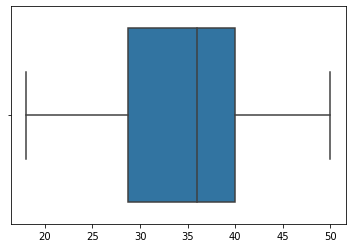

In [ ]:
sb.boxplot(x=x)

# Checking for categorical column and performing encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ab.Gen=le.fit_transform(ab.Gender)
ab.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
colmn=ab.columns[2:]
colmn

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# Scaling the data

In [10]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scaled_data=scale.fit_transform(ab[colmn])
scaled_data=pd.DataFrame(scaled_data,columns=colmn)
scaled_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,0.400962,0.373443,0.502041
std,0.268635,0.215285,0.263505
min,0.000000,0.000000,0.000000
25%,0.206731,0.217213,0.344388
50%,0.346154,0.381148,0.500000
75%,0.596154,0.516393,0.734694
max,1.000000,1.000000,1.000000


# Performing clustering algorithm

In [11]:
from sklearn.cluster import KMeans
clustering=KMeans(n_clusters=7)
clus_alg=clustering.fit_predict(scaled_data)
clus_alg

array([6, 1, 6, 1, 6, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 5, 1,
       4, 1, 5, 6, 6, 6, 5, 1, 6, 2, 5, 5, 5, 2, 6, 5, 2, 6, 2, 5, 2, 6,
       5, 2, 6, 6, 2, 5, 2, 2, 2, 6, 5, 5, 6, 5, 2, 5, 2, 5, 6, 5, 5, 6,
       6, 5, 2, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 2, 6, 5, 6, 2, 5, 2, 2,
       2, 6, 5, 6, 6, 6, 2, 5, 5, 5, 6, 5, 5, 3, 6, 3, 5, 3, 0, 3, 0, 3,
       6, 3, 6, 3, 0, 3, 6, 3, 0, 3, 6, 3, 6, 3, 5, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 5, 3, 6, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

# Adding cluster data with primary dataset

In [12]:
ab["cluster"]=clus_alg
ab

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,6
1,2,Male,21,15,81,1
2,3,Female,20,16,6,6
3,4,Female,23,16,77,1
4,5,Female,31,17,40,6
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


# Spliting data into dependent and independent variables

In [14]:
s=ab.drop(["Gender"],axis=1)
dv=s["Spending Score (1-100)"]
dv

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [15]:
iv=s.iloc[:,:-1]
iv

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [17]:
y=ab["Spending Score (1-100)"]
scaler = StandardScaler()
scaler.fit_transform(y.values[Ellipsis, None])

array([[-0.43480148],
       [ 1.19570407],
       [-1.71591298],
       [ 1.04041783],
       [-0.39597992],
       [ 1.00159627],
       [-1.71591298],
       [ 1.70038436],
       [-1.83237767],
       [ 0.84631002],
       [-1.4053405 ],
       [ 1.89449216],
       [-1.36651894],
       [ 1.04041783],
       [-1.44416206],
       [ 1.11806095],
       [-0.59008772],
       [ 0.61338066],
       [-0.82301709],
       [ 1.8556706 ],
       [-0.59008772],
       [ 0.88513158],
       [-1.75473454],
       [ 0.88513158],
       [-1.4053405 ],
       [ 1.23452563],
       [-0.7065524 ],
       [ 0.41927286],
       [-0.74537397],
       [ 1.42863343],
       [-1.7935561 ],
       [ 0.88513158],
       [-1.7935561 ],
       [ 1.62274124],
       [-1.4053405 ],
       [ 1.19570407],
       [-1.28887582],
       [ 0.88513158],
       [-0.93948177],
       [ 0.96277471],
       [-0.59008772],
       [ 1.62274124],
       [-0.55126616],
       [ 0.41927286],
       [-0.86183865],
       [ 0

# Spliting data into training and testing

In [18]:
a=ab.drop(["Gender"],axis=1)
X = a["Spending Score (1-100)"].values.reshape(-1,1)
y = a.iloc[:,:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [19]:
X_train.shape

(100, 1)

In [20]:
X_test.shape

(100, 1)

In [21]:
y_train.shape

(100, 5)

In [22]:
y_test.shape

(100, 5)

# Building the model

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

# Training the model

In [26]:
model.fit(X_train,y_train)

LinearRegression()

# Testing the model

In [28]:
p=model.predict(X_test)
p

array([[104.23944146,  41.02843949,  61.79243664,  29.        ,
          3.30323495],
       [102.21701462,  30.52678022,  62.07378209,  94.        ,
          3.54988488],
       [102.34147166,  31.17303618,  62.05646852,  90.        ,
          3.53470642],
       [102.87041406,  33.91962399,  61.98288587,  73.        ,
          3.47019798],
       [104.45724128,  42.15938742,  61.7621379 ,  22.        ,
          3.27667265],
       [102.27924314,  30.8499082 ,  62.0651253 ,  92.        ,
          3.54229565],
       [102.3103574 ,  31.01147219,  62.06079691,  91.        ,
          3.53850104],
       [103.08821387,  35.05057191,  61.95258713,  66.        ,
          3.44363568],
       [102.80818554,  33.59649601,  61.99154265,  75.        ,
          3.47778721],
       [104.83061238,  44.09815528,  61.7101972 ,  10.        ,
          3.23113728],
       [102.24812888,  30.68834421,  62.0694537 ,  93.        ,
          3.54609027],
       [102.74595702,  33.27336803,  62.000

# Measuring the performance using metrics

In [29]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test,p)))

29.820227878677226
